# **Lab 3: Neural Networks**

Intagliata Emanuele (928166)

Surricchio Mattia (920715)

Link: https://colab.research.google.com/drive/13PVfQnMVboW80Dqda4zW2hmeV3ZmTvgL#scrollTo=7bOFvZhFuCmU

#**IMPORTANT: The first step is always to SAVE A COPY OF THIS NOTEBOOK in your own Google Drive and do the work on your own document.**  (File --> Save a copy in Drive)

In this lab we will start to work with deep learning models. We will begin by looking at simple examples with synthetically generated data. Then, you will move to a more challenging and realistic problem.

### **Exercise 1**: Approximating Synthetic Data

Execute the following lines for create a synthetically generated dataset:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import librosa
import sklearn
import tensorflow as tf
plt.style.use('seaborn')

Generating dataset. We're basically creating 2 random distributions. First we create a line of points (horizontal) using `x = np.random.rand(size,1)-0.5`. Then  ` y = a*x + b` creates a line with `a` as inclination and `b` as offset. Then we apply this eq only for the x greater than 0, so we get an horizontal line centered in 0 for x<0 and the the original inclined line for x>0. Then we  add a randomization along the line axis using `0.2*(np.random.randn(*x.shape))`


In [2]:
def gen_data(size, a, b):
  x = np.random.rand(size,1)-0.5
  y = a*x + b
  y = y*(x>0)
  y = y + 0.2*(np.random.randn(*x.shape))
  return x, y

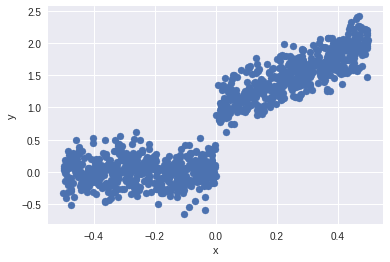

In [3]:
# Create data and plot
Xdata, Ydata = gen_data(1000, 2, 1)
plt.scatter(Xdata,Ydata);
plt.xlabel('x');
plt.ylabel('y');

Describe the function underlying the model used to generate the data. Complete the symbols "?"

\begin{equation}
  y(x)=\begin{cases}
    0, & \text{if x<0}\\
    2x+1, & \text{otherwise}.
  \end{cases}
\end{equation}


### **Exercise 2**: Create a MLP neural network model using Keras

Create the following fully-connected feedforward network using Keras' sequential model. Use:

*   ReLU activation in the hidden layers.
*   Linear activation in the output layer.

Show the model's summary.

![](https://drive.google.com/uc?export=view&id=1UJwycQXQG8kkF0N8CmDW-ED-hY-Uck5o)



We create a simple multilayer network. We stack layers using the `add` function

In [4]:
# Fully-connected MLP
model_ex2 = tf.keras.models.Sequential()
model_ex2.add(tf.keras.Input(shape=(1,)))
model_ex2.add(tf.keras.layers.Dense(5, activation= 'relu'))
model_ex2.add(tf.keras.layers.Dense(5, activation= 'relu'))
model_ex2.add(tf.keras.layers.Dense(1, activation= 'linear'))
model_ex2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


How many parameters has the model?

*The model has 46 parameters*

Compile the model and train it on Xdata using the SGD optimizer with learning rate 0.01. Train the model until reaching 300 epochs.

In [ ]:
sgd = tf.keras.optimizers.SGD(learning_rate= 0.01)
model_ex2.compile(optimizer=sgd, loss='MSE') # we want to minimize the MSE
history2 =  model_ex2.fit(Xdata, Ydata, epochs = 300)

Plot the training history of the network, showing the evolution of the training loss.

*We can see how the loss decreases with the number of epochs, this means that the network is learning the input data.*

Text(0.5, 0, 'epoch')

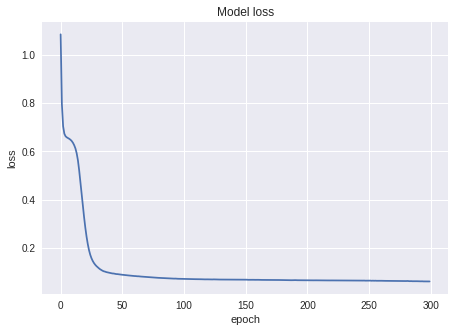

In [6]:
# Loss
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(history2.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

Which is the minimum loss achieved by the model? At which epoch achieved that loss value?

In [7]:
# minimum loss achieved 
min_acc = np.min(history2.history['loss'])
min_acc_index = history2.history['loss'].index(min_acc)
print('Minimum loss achieved by the model: ', min_acc)
print('Achieved at epoch number', min_acc_index+1)


Minimum loss achieved by the model:  0.060389794409275055
Achieved at epoch number 300


Plot the true training data together with the approximated data using the predictions.

*The model has learnt an output function that follows the overall "shape" of the data. This is a typical regression task.*

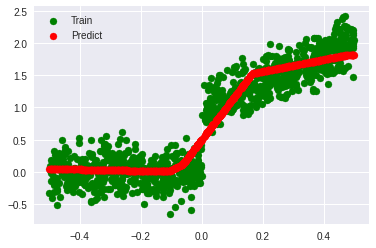

In [8]:
# Prediction
preds = model_ex2.predict(Xdata)

# Plot
plt.scatter(Xdata, Ydata, c='g')
plt.scatter(Xdata, preds, c='r')
plt.legend(['Train', 'Predict'])

Now initialize the model again and fit it, but train it for 1000 epochs.

In [ ]:
# Fully-connected MLP
model_ex2b = tf.keras.models.Sequential()
model_ex2b.add(tf.keras.Input(shape=(1,)))
model_ex2b.add(tf.keras.layers.Dense(5, activation= 'relu'))
model_ex2b.add(tf.keras.layers.Dense(5, activation= 'relu'))
model_ex2b.add(tf.keras.layers.Dense(1, activation= 'linear'))
model_ex2b.summary()

# Optimizers
sgd = tf.keras.optimizers.SGD(learning_rate= 0.01)
model_ex2b.compile(optimizer=sgd, loss='MSE') # we want to minimize the MSE
history2b =  model_ex2b.fit(Xdata, Ydata, epochs = 1000)

Plot the original data and the predicted data. What are the differences observed with respect to the case before?

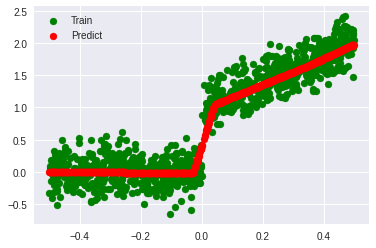

In [10]:
# Prediction
preds = model_ex2b.predict(Xdata)

# Plot
plt.scatter(Xdata, Ydata, c='g')
plt.scatter(Xdata, preds, c='r')
plt.legend(['Train', 'Predict'])

**Discussion**: *the second model has learnt "better" the original function. Since it has been running for more epochs, it saw more data, thus being able to better fit the input data. However, this is not enough to choose which model is actually better. The second one is approximating the input data much better, but without any validation or test set, this could be a case of overfitting. So maybe the first model could be better, since it's not "copying" the input data so much. 
In any case we need a validation and test set to address which model is actually better.*

What is the best loss achieved in this case?

Minimum loss achieved by the model:  0.044529207050800323
Achieved at epoch number 997


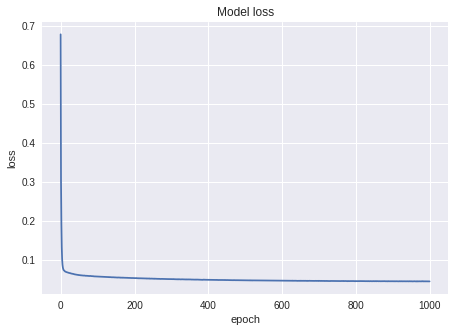

In [11]:
# Loss
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(history2b.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

# minimum loss achieved 
min_acc = np.min(history2b.history['loss'])
min_acc_index = history2b.history['loss'].index(min_acc)
print('Minimum loss achieved by the model: ', min_acc)
print('Achieved at epoch number', min_acc_index+1)


### **Exercise 3**: Classification

Generate synthetically two bivariate Gaussian vectors, each one with 1000 samples:

*   Xdata0, with mean [-1,-1] and covariance [[4,0],[0,4]]
*   Xdata1, with mean [1,1] and covariance [[3,0],[0,3]]





**Discussion**

We will use the numpy function ``` multivariate_normal ```.

Sintax:

```
numpy.random.multivariate_normal(mean, cov, size=None, check_valid='warn', tol=1e-8)
```






We're creating 2 dataset cusing 2 different multivariate Gaussian with the given means and covariance matrices.

In [12]:
# Generate random normals
Xdata0 = np.random.multivariate_normal( [-1,-1] , [[4,0],[0,4]], size=1000, check_valid='warn', tol=1e-8)
Xdata1 = np.random.multivariate_normal( [1,1] , [[3,0],[0,3]], size=1000, check_valid='warn', tol=1e-8)

Xdata0.shape

(1000, 2)

From the above Gaussian vectors, stack them to generate a feature data matrix Xdatac with shape (2000,2) and the corresponding label vector Ydatac with zeros and ones of shape (2000,)

In [13]:
# Feature data
Xdatac = np.concatenate((Xdata0, Xdata1), axis=0)
Xdatac.shape

(2000, 2)

In [14]:
# Labels
labels_ex3 = np.concatenate((np.zeros((1000,)), np.ones((1000,))), axis=0)
labels_ex3.shape

(2000,)

Create a scatterplot of the two classes:

We can see the 2 gaussian distribution in red and green. They're coherent with what we have declared in the generation function.

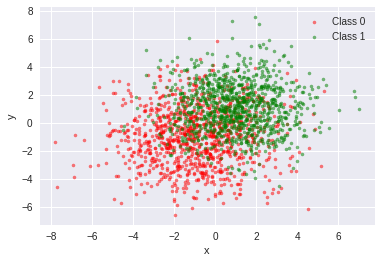

In [15]:
# Plot the data
plt.scatter(Xdatac[(labels_ex3==0),0], Xdatac[(labels_ex3==0),1], c='r', s=10, alpha=0.5)
plt.scatter(Xdatac[(labels_ex3==1),0], Xdatac[(labels_ex3==1),1], c='g', s=10, alpha=0.5)
plt.xlabel('x') 
plt.ylabel('y')
plt.legend(('Class 0', 'Class 1'))
plt.show()

Divide the data Xdatac into a training partition and validation partition using "train_test_split" from sklearn. Use 30% of your data for validation.

In [16]:
from sklearn.model_selection import  train_test_split

In [17]:
X_train3, X_val3, labels_ex3_train, labels_ex3_val = train_test_split(Xdatac, labels_ex3, test_size=0.3)

print(X_train3.shape)
print(X_val3.shape)
print(labels_ex3_train.shape) 
print(labels_ex3_val.shape)

(1400, 2)
(600, 2)
(1400,)
(600,)


Create a model identical to the one of Exercise 2 but use sigmoid activation in the output layer.
You need also now to specify that the input has two values.

Train the model on the training partion. Select as loss function "binary_crossentropy" and monitor the training accuracy using metrics=["accuracy"]. Use also the validation partition to track the validation accuracy at each epoch.

In [ ]:
# Fully-connected MLP
model_ex3 = tf.keras.models.Sequential()
model_ex3.add(tf.keras.Input(shape=(2,)))
model_ex3.add(tf.keras.layers.Dense(5, activation= 'relu'))
model_ex3.add(tf.keras.layers.Dense(5, activation= 'relu'))
model_ex3.add(tf.keras.layers.Dense(1, activation= 'sigmoid'))
model_ex3.summary()

# Optimizer
sgd = tf.keras.optimizers.SGD(learning_rate= 0.01)
model_ex3.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy']) 
history_ex3 =  model_ex3.fit(X_train3, labels_ex3_train, validation_data= (X_val3, labels_ex3_val), epochs = 300)


Plot the training history showing the training accuracy and validation accuracy.
We can see that the validation accuracy is pretty high and almost identical to the training one.

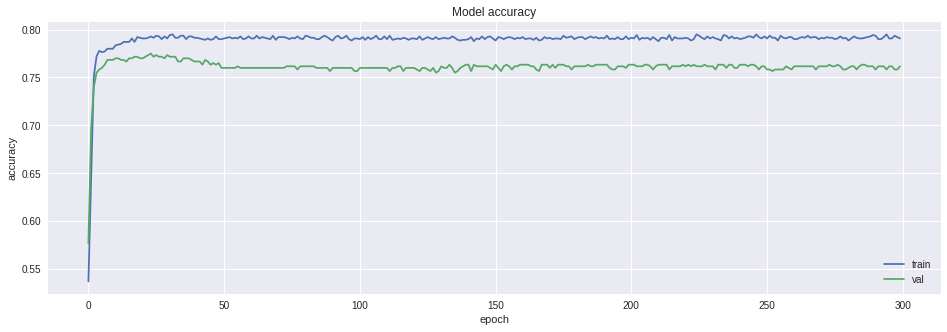

In [19]:
# Accuracy
plt.figure(figsize=(16,5))
plt.plot(history_ex3.history['accuracy'])
plt.plot(history_ex3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])


Predict over the training data and create a scatter plot showing the predicted class for each data example.

In [20]:
# Prediction
# preds_ex3 = model_ex3.predict_classes(X_train3)
preds_ex3 = (model_ex3.predict(X_train3) > 0.5).astype("int32")

preds_ex3.shape

(1400, 1)

*The following scatter plot shows the correct/wrong predictions for each class of data. In the first plot we notice that the missclassified data take the upper right part of the distribution, while in the right plot we're missclassifying the lower right part. This is reasonable since those points belong to the overlapping part of the original gaussian distributions, thus our model has some difficulties in recognizing those points.*

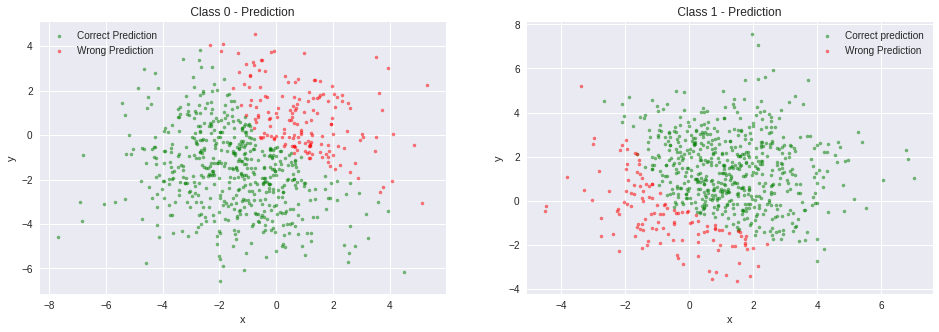

In [21]:
# Plot
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.scatter(X_train3[np.logical_and((preds_ex3[:,0]==0) , (labels_ex3_train==0)),0], X_train3[np.logical_and((preds_ex3[:,0]==0) , (labels_ex3_train==0)),1], c='g', s=10, alpha=0.5)
plt.scatter(X_train3[np.logical_and((preds_ex3[:,0]==1) , (labels_ex3_train==0)),0], X_train3[np.logical_and((preds_ex3[:,0]==1) , (labels_ex3_train==0)),1], c='r', s=10, alpha=0.5)
plt.xlabel('x') 
plt.ylabel('y')
plt.title(' Class 0 - Prediction ')
plt.legend(['Correct Prediction', 'Wrong Prediction'])

plt.subplot(1,2,2)
plt.scatter(X_train3[np.logical_and((preds_ex3[:,0]==1) , (labels_ex3_train==1)),0], X_train3[np.logical_and((preds_ex3[:,0]==1) , (labels_ex3_train==1)),1], c='g', s=10, alpha=0.5)
plt.scatter(X_train3[np.logical_and((preds_ex3[:,0]==0) , (labels_ex3_train==1)),0], X_train3[np.logical_and((preds_ex3[:,0]==0) , (labels_ex3_train==1)),1], c='r', s=10, alpha=0.5)
plt.xlabel('x') 
plt.ylabel('y')
plt.title(' Class 1 - Prediction ')
plt.legend(['Correct prediction', 'Wrong Prediction'])
plt.show()

### **Exercise 4**: Data Preparation


Follow the same steps in Lab 2 to download the ESC-50 dataset.

In [22]:
!apt-get install subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
subversion is already the newest version (1.9.7-4ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [23]:
!svn checkout https://github.com/karolpiczak/ESC-50/trunk/audio

Checked out revision 27.


The Github repository specifies the following naming convention:

2000 audio recordings in WAV format (5 seconds, 44.1 kHz, mono) with the following naming convention:

{FOLD}-{CLIP_ID}-{TAKE}-{TARGET}.wav

{FOLD} - index of the cross-validation fold,

{CLIP_ID} - ID of the original Freesound clip,

{TAKE} - letter disambiguating between different fragments from the same Freesound clip,

{TARGET} - class in numeric format [0, 49].

In [24]:
# Get a list of all audio files and get the class label for each file
audiofiles = [str(file) for file in Path().glob('audio/*.wav')]
labels = []
for i,file in enumerate(audiofiles):
  fileid = file.split('.wav')[-2]
  target = fileid.split('-')[-1]
  labels.append(int(target))

Create a list of the files corresponding to the 10 first classes. Those files will form our dataset (400 signals).

In [25]:
files = [audiofiles[i] for i,l in enumerate(labels) if l<10]
labels = [l for l in labels if l<10]

Create a list storing the signals from all the files:

In [26]:
signals = list(librosa.load(file)[0] for file in files)

For each signal in the list, compute the melspectrogram with librosa using default parameters:

*From documentation:*
```
librosa.feature.melspectrogram(y=None, sr=22050, S=None, n_fft=2048, hop_length=512, win_length=None, window='hann', center=True, pad_mode='reflect', power=2.0, **kwargs)
```



In [27]:
melspect = list(librosa.feature.melspectrogram(sgnl, sr=44100) for sgnl in signals)


Convert the list to a numpy array called Xdata. You should end up with an array of shape (400, 128, 216). What do these numbers mean?

In [28]:
Xdata = np.array(melspect)
Xdata.shape

(400, 128, 216)

**Answer**

*400 is the number of files we consider; 128 is the number of Mel bands and 216 are the temporal dimension of the spectrogram.*

### **Exercise 5**: MLP Classification

Let's try now to classify the audio files by using the computed mel spectrogram data. First, flatten each spectrogram into a one-dimensional array, so that you end up with a new array Xdata_f of shape (400, 27648). You can do that by using the function reshape from numpy.

In [29]:
Xdata_f = np.reshape(Xdata, (Xdata.shape[0], Xdata.shape[1]*Xdata.shape[2]))
Xdata_f.shape

(400, 27648)

Let's first use the preprocessing.scale function to scale the data (save the output in Xdata_s)

In [30]:
Xdata_s = sklearn.preprocessing.scale(Xdata_f, axis=0)

Xdata_s.shape
print('mean per column:',Xdata_s.mean(axis=0))
print('std per column:',Xdata_s.std(axis=0))
Xdata_s.std(axis=0).shape

mean per column: [ 6.48786580e-18  1.13797860e-17 -8.43075609e-17 ... -2.47024623e-17
 -1.45335133e-16  7.91033905e-18]
std per column: [1. 1. 1. ... 1. 1. 1.]


(27648,)

Create a test and validation split with 20% of the samples. Call the splits X_train, y_train, X_val, y_val.

In [31]:
# if not previously imported in Ex.3
from sklearn.model_selection import  train_test_split

In [32]:
y_total = np.asarray(labels)
print(y_total.shape)

X_train, X_val, y_train, y_val = train_test_split(Xdata_s, y_total, test_size=0.2)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(400,)
(320, 27648)
(80, 27648)
(320,)
(80,)


Now, create a MLP-based network for classifying these audios. You can use the same layer structure as in the previous examples, but remember to adapt the output layer so that its size is equal to the number of classes and apply 'softmax' activation. You can also try to increase the number of neurons in the hidden layers.

In [33]:
model_ex5 = tf.keras.models.Sequential()
model_ex5.add(tf.keras.Input(shape=(X_train.shape[1],)))
# Stacked layers
model_ex5.add(tf.keras.layers.Dense(512, activation='relu'))
model_ex5.add(tf.keras.layers.Dense(256, activation='relu'))
model_ex5.add(tf.keras.layers.Dense(64, activation='relu'))
# Output layer
model_ex5.add(tf.keras.layers.Dense(10, activation='softmax'))
model_ex5.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               14156288  
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                650       
Total params: 14,304,714
Trainable params: 14,304,714
Non-trainable params: 0
_________________________________________________________________


Fit the model using "sparse_categorical_crossentropy" as loss function. Probably your first attempts will overfit.




In [ ]:
# first attempt

# optimezer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_ex5.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit
history5 = model_ex5.fit(X_train, y_train, validation_data= (X_val, y_val), batch_size=64, epochs=300)

Plot the training history

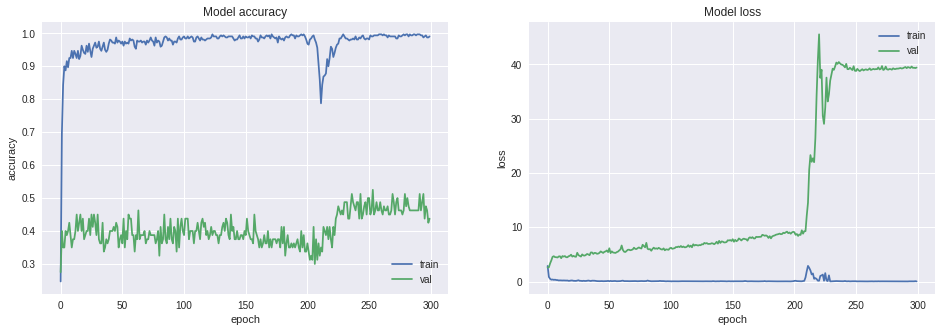

In [35]:
plt.figure(figsize=(16,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

# Loss
plt.subplot(1,2,2)
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

*It can be seen that the model is overfitting from both the accuracy and the loss graphs. The loss slowly increases until it gets out of control at around 220 epochs* 

Try different strategies to prevent overfitting:

*   Dropout
*   Regularization
*   Reduce number of neurons/layers

What is the best accuracy you could get with a fully-based MLP network?

In [36]:
model_ex5b = tf.keras.models.Sequential()
model_ex5b.add(tf.keras.Input(shape=(X_train.shape[1],)))
# Stacked layers
model_ex5b.add(tf.keras.layers.Dense(256, activation='relu' , kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model_ex5b.add(tf.keras.layers.Dropout(0.5))
model_ex5b.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model_ex5b.add(tf.keras.layers.Dropout(0.7))
# Output layer
model_ex5b.add(tf.keras.layers.Dense(10, activation='softmax'))
model_ex5b.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 256)               7078144   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                650       
Total params: 7,095,242
Trainable params: 7,095,242
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_ex5b.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit
history5b = model_ex5b.fit(X_train, y_train, validation_data= (X_val, y_val), batch_size=64, epochs=300)

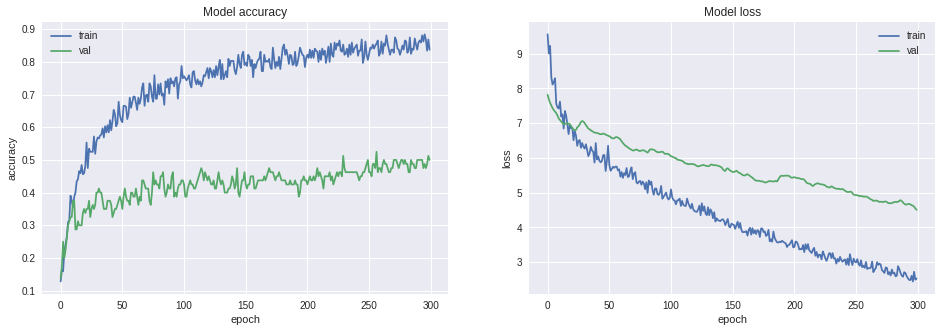

In [38]:
plt.figure(figsize=(16,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history5b.history['accuracy'])
plt.plot(history5b.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

# Loss
plt.subplot(1,2,2)
plt.plot(history5b.history['loss'])
plt.plot(history5b.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

*Adding dropout and regularization improves our model performances. The validation loss decreases smoothly with the training loss, which is a good sign of learning. The accuracy is improved if compared with the previous model without any regularization, we're not overfitting so much as before* 

### **Exercise 6**: CNN

Create training and validation partitions from Xdata. Remember that Xdata stores has size (400, 128, 216), storing 400 Mel spectrograms of sie (128,216). Name the partitions X_train, X_test, y_train and y_test.

In [39]:
X_train6, X_val6, y_train6, y_val6 = train_test_split(Xdata, y_total, test_size=0.2)

print(X_train6.shape)
print(X_val6.shape)
print(y_train6.shape)
print(y_val6.shape)

(320, 128, 216)
(80, 128, 216)
(320,)
(80,)


Scale each spectrogram by substracting its mean and dividing by its standard deviation.

In [40]:
Xdata.shape

(400, 128, 216)

In [41]:
media = X_train6.mean(axis=(1,2), keepdims=True)
stdv = X_train6.std(axis=(1,2), keepdims= True)
X_train6s =  (X_train6 - media)/stdv

media = X_val6.mean(axis=(1,2), keepdims=True)
stdv = X_val6.std(axis=(1,2), keepdims= True)
X_val6s =  (X_val6 - media)/stdv
X_val6s.shape

(80, 128, 216)

Create a convolutional neural network model. Remember to adapt the input shape of the first layer to the new input. 

You can start with a model like the next one. Remember to include regularization strategies like dropout layers.

![](https://drive.google.com/uc?export=view&id=1WRY3iOCsOdZaeLLslqSFKcJ7Bs-Q0iI9)


In [42]:
model_ex6 = tf.keras.models.Sequential()
input_shape = (X_train6s.shape[1], X_train6s.shape[2], 1)
print(input_shape)

# 1st convolutional layer
model_ex6.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape))
model_ex6.add(tf.keras.layers.MaxPooling2D((3,3), strides=(3,3), padding='same'))
model_ex6.add(tf.keras.layers.BatchNormalization())

# 2nd convolutional layer
model_ex6.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))
model_ex6.add(tf.keras.layers.MaxPooling2D((2,2), strides=(2,2), padding='same'))
model_ex6.add(tf.keras.layers.BatchNormalization())


# 3rd convolutional layer 
model_ex6.add(tf.keras.layers.Conv2D(32, (2,2), activation='relu'))
# flatten output and feed it to a dense layer
model_ex6.add(tf.keras.layers.Flatten())
model_ex6.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model_ex6.add(tf.keras.layers.Dropout(0.55))

# output layer
model_ex6.add(tf.keras.layers.Dense(10, activation='softmax'))
model_ex6.summary()

(128, 216, 1)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 214, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 42, 72, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 42, 72, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 70, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 35, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 20, 35, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 

Fit the model and try to improve the results obtained with the MLP model.

In [43]:
X_train6s = np.expand_dims(X_train6s,axis=3)
X_val6s = np.expand_dims(X_val6s,axis=3)

In [ ]:
# compile model
adamopt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_ex6.compile(optimizer=adamopt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# model fit
history6 = model_ex6.fit(X_train6s, y_train6, validation_data=(X_val6s, y_val6), batch_size=32, epochs=150)

Plot the training history:

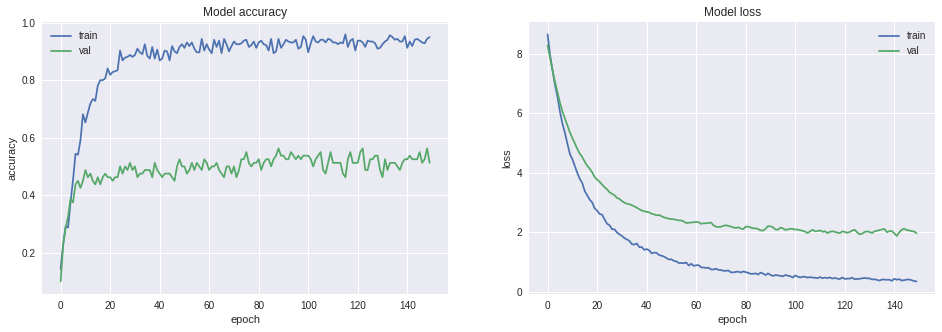

In [45]:
plt.figure(figsize=(16,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

# Loss
plt.subplot(1,2,2)
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

*Our CNN model performs slightly better than the MLP, but not that much. The MLP was already doing a decent job* 

Tune your model and try to achieve an accuracy above 60%.

In [54]:
model_ex6b = tf.keras.models.Sequential()
input_shape = (X_train6s.shape[1], X_train6s.shape[2], 1)
print(input_shape)

# 1st convolutional layer
model_ex6b.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape))
model_ex6b.add(tf.keras.layers.MaxPooling2D((3,3), strides=(3,3), padding='same'))
model_ex6b.add(tf.keras.layers.BatchNormalization())

# 2nd convolutional layer
model_ex6b.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model_ex6b.add(tf.keras.layers.MaxPooling2D((2,2), strides=(2,2), padding='same'))
model_ex6b.add(tf.keras.layers.BatchNormalization())


# 3rd convolutional layer 
model_ex6b.add(tf.keras.layers.Conv2D(32, (2,2), activation='relu'))
model_ex6b.add(tf.keras.layers.MaxPooling2D((2,2), strides=(2,2), padding='same'))
model_ex6b.add(tf.keras.layers.BatchNormalization())

# flatten output and feed it to a dense layer
model_ex6b.add(tf.keras.layers.Flatten())
model_ex6b.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model_ex6b.add(tf.keras.layers.Dropout(0.5))
model_ex6b.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model_ex6b.add(tf.keras.layers.Dropout(0.35)) #0.5 
model_ex6b.add(tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model_ex6b.add(tf.keras.layers.Dropout(0.5)) #0.8

# output layer
model_ex6b.add(tf.keras.layers.Dense(10, activation='softmax'))
model_ex6b.summary()

(128, 216, 1)
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 126, 214, 64)      640       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 42, 72, 64)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 42, 72, 64)        256       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 40, 70, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 20, 35, 64)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 20, 35, 64)        256       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 19, 

In [ ]:
# compile model
adamopt = tf.keras.optimizers.Adam(learning_rate=0.001) # 0.0008
model_ex6b.compile(optimizer=adamopt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# model fit
history6b = model_ex6b.fit(X_train6s, y_train6, validation_data=(X_val6s, y_val6), batch_size=64, epochs=300) 

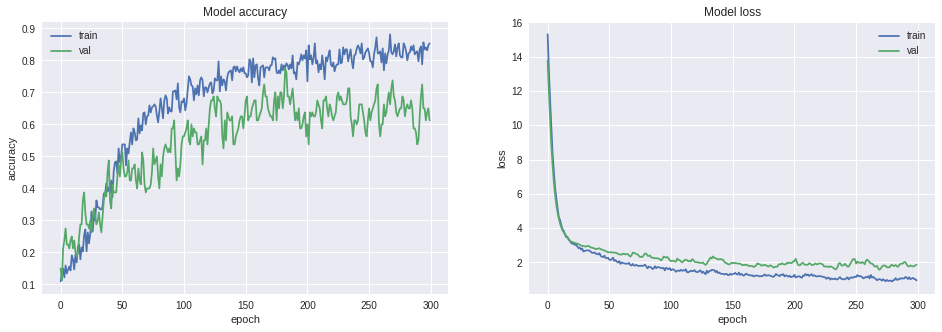

In [56]:
plt.figure(figsize=(16,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history6b.history['accuracy'])
plt.plot(history6b.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

# Loss
plt.subplot(1,2,2)
plt.plot(history6b.history['loss'])
plt.plot(history6b.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

In [57]:
# best validation accuracy
best_acc = np.max(history6b.history['val_accuracy'])
print('Best validation accuracy: {0:5.1f} % '.format(best_acc*100))

Best validation accuracy:  77.5 % 


*The validation loss follows the training loss, which is a good sign of learning. The validation accuracy is also really close to the training one, if compared to the previous models. This is a good sign of generalization and learning*